# Generador

In [1]:
sem = 0
def congruencial_mixto(cantidad, semi=None, a=6364136223846793005, c=1442695040888963407, m=((2 ** 64))):
    global sem
    if semi is not None:
        sem = semi
    numeros = []
    xo = sem
    if cantidad == 1:
        aXi = ( ((a * xo) + c) % m)
        sem = aXi
        return (aXi/m)
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros

# Variable poisson

In [2]:
from math import exp
def variable_poisson(lamda):
    """
    Generador de variables aleatorioas con la distribucción poisson
    """
    i = 0
    p = exp(-lamda)
    F = p
    U = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)
    while U >= F:
        p = lamda * p /(i + 1)
        F = F + p
        i = i + 1
    return i

In [3]:
from math import log
def exponencial(l):
    """
    Generadora exponencial
    @param l: parametro lambda
    return x numero aleatorio siguiendo la funcion exponencial
    """
    U = congruencial_mixto(1)
    x = -(log(1-U)/float(l))
    return x

In [4]:
from math import exp
def integral(lim_inferior, lim_superior):
    numeros_aleatorios = congruencial_mixto(cantidad=1000)
    result = 0
    for num in numeros_aleatorios:
        num = lim_inferior + (lim_superior - lim_inferior)* num
        result = result + (exp(-(num ** 2)))
    return (result * (lim_superior - lim_inferior)) / len(numeros_aleatorios)

In [5]:
from math import sqrt
from math import pi
raiz = sqrt(pi)
def error_function(probability):
    return (2 / raiz)*integral(0, probability)

In [6]:
C_k = [1.0]* 30
def calculate_ck():
    global C_k
    for i in range(2, len(C_k)):
        result = 0
        for k in range (0, i):
            result = result + ((C_k[k] * C_k[i - 1 - k])/((k + 1) * (2 * k + 1)))
        C_k[i] = result
        result = 0
calculate_ck()

In [7]:
from math import sqrt
from math import pi
def error_inverse_function(probabilidad):
    result = 0
    for i in range(0, len(C_k)):
        result = result + (C_k[i] * ((probabilidad * sqrt(pi)/2) ** (2 * i + 1)) / (2 * i + 1))
    return result

In [8]:
from math import sqrt
from math import fabs
raiz2 = sqrt(2)
def variable_normal(miu, sigma):
    p = congruencial_mixto(cantidad=1)
    variable_normal = miu + ((sigma * raiz2) *(error_inverse_function(2 * p - 1)))
    return fabs(variable_normal)

In [9]:
def llegada(t_suc):
    global t, n, N_LL, LL, parametro_lambda_llegada
    t = t_suc
    clientes.append(n)
    tiempo.append(t)
    n = n + 1
    clientes.append(n)
    tiempo.append(t)
    N_LL = N_LL + 1
    LL.append(t)
    X = exponencial(parametro_lambda_llegada)
    if t + X < T:
        TSuc['T_ll'] = t + X
    if n == 1:
        global parametro_lambda_servidor
        Y = exponencial(parametro_lambda_servidor)
        TSuc['T_s'] = t + Y
        Serv.append(Y)
        
    

In [10]:
def servidor(t_suc):
    global t, n, N_s, S
    t = t_suc
    clientes.append(n)
    tiempo.append(t)
    n = n - 1
    clientes.append(n)
    tiempo.append(t)
    N_s = N_s + 1
    S.append(t)
    if n > 0:
        Y = variable_normal(1, 0)
        TSuc['T_s'] = t + Y
        Serv.append(Y)
        
    

El Tiempo medio del sistema es: 1.6001145519366202
El Tiempo medio de la cola es: 0.9144355774899598
El tiempo medio del servidor es: 0.7305819780971377


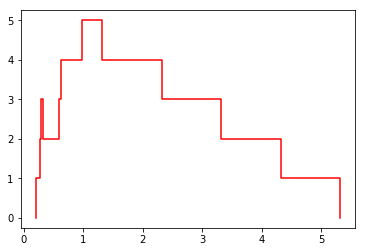

In [12]:
import matplotlib.pyplot as plt
t = t_suc = N_LL = N_s = n = 0
T = 1
M = (2 ** 64)
TSuc = {'T_ll':M, 'T_s':M} # Estructura de datos para guardar los tiempos de llegada tLL y los tiempos de conclusión de servicio tS.
LL = [0] # instante en el que llega el cliente i-ésimo al sistema.
S = [0] # instante en el que sale del sistema el cliente i-ésimo.
Serv = [0] # tiempo de servicio recibido por el cliente i-ésimo.
tiempo = []
clientes = []
parametro_lambda_llegada = 3
parametro_lambda_servidor = 5
X = exponencial(parametro_lambda_llegada)
if X > T:
    T_p = t_med_sistema = t_med_cola = 0
else:
    llegada(X)
    while (TSuc['T_ll'] != M or TSuc['T_s'] != M):
        if TSuc['T_ll'] < TSuc['T_s']:
            t_suc = TSuc['T_ll']
            TSuc['T_ll'] = M
            llegada(t_suc)
        if TSuc['T_s'] < TSuc['T_ll']:
            t_suc = TSuc['T_s']
            TSuc['T_s'] = M
            servidor(t_suc)
    T_p = max(0, t - T) # tiempo transcurrido desde T hasta que el último cliente abandona el sistema (variable de salida).
    acumulo1 = acumulo2 = 0
    ind = 0
    while ind < N_LL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1 / N_LL # tiempo medio que pasan los clientes en el sistema (variable de salida).
    t_med_cola = acumulo2 / N_LL # tiempo medio que pasan los clientes en la cola (variable de salida).
    print ("El Tiempo medio del sistema es: {}".format(t_med_sistema))
    print ("El Tiempo medio de la cola es: {}".format(t_med_cola))
    print ("El tiempo medio del servidor es: {}".format(sum(Serv)/len(Serv)))
    # print ("S", S)
    # print ("Serv", Serv)
    # print ("LL", LL)
    plt.plot(tiempo, clientes, color="r", label='Clientes Sistema')
    plt.show()